In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/heart_disease_uci.csv')

In [2]:
rows , columns = df.shape
print("there arre ", rows, " rows and " , columns , "columns.")

there arre  920  rows and  16 columns.


In [3]:
missing_values = df.isnull().any().sum()
print(f'There are {missing_values} columns in dataset that have missing values')


There are 10 columns in dataset that have missing values


In [4]:
missing_columns = df.columns[df.isnull().any()]
print("Columns with missing values:", missing_columns.tolist())


Columns with missing values: ['trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64


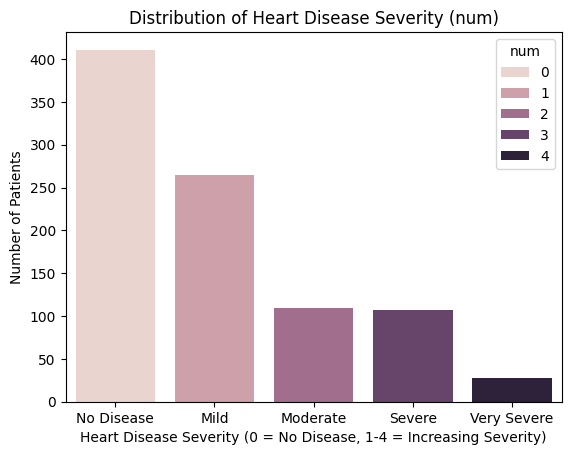

In [5]:
#● What is the distribution of the target variable (presence of heart disease: 0 or 1)?
target_distribution = df['num'].value_counts()
print(target_distribution)
sns.countplot(x=df['num'], hue=df['num'])
plt.title("Distribution of Heart Disease Severity (num)")
plt.xlabel("Heart Disease Severity (0 = No Disease, 1-4 = Increasing Severity)")
plt.ylabel("Number of Patients")
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=['No Disease', 'Mild', 'Moderate', 'Severe', 'Very Severe'])
plt.show()


Number of patients without heart disease: 411
Number of patients with heart disease: 509


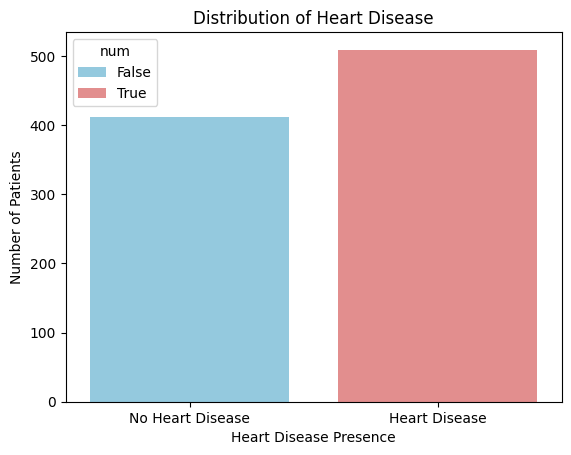

In [6]:
#● How many patients have heart disease, and how many don’t?

without_heart_disease = (df['num'] == 0).sum()
print(f"Number of patients without heart disease: {without_heart_disease}")
with_heart_disease= (df['num'] >0).sum()
print(f"Number of patients with heart disease: {with_heart_disease}")

sns.countplot(x=(df['num'] > 0) , hue=df['num'] > 0,palette=['skyblue', 'lightcoral'])
plt.title("Distribution of Heart Disease")
plt.xticks(ticks=[0, 1], labels=['No Heart Disease', 'Heart Disease'])
plt.xlabel("Heart Disease Presence")
plt.ylabel("Number of Patients")
plt.show()

In [7]:
#What is the age range of patients in the dataset?
print(df['age'].describe() )
print('minimum age range of person is: ',df['age'].min())
print('maximum age range of person is:',df['age'].max())


count    920.000000
mean      53.510870
std        9.424685
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64
minimum age range of person is:  28
maximum age range of person is: 77


In [8]:
#● What is the gender distribution of the patients?
gender_distribution = df['sex'].value_counts()
print(gender_distribution)


sex
Male      726
Female    194
Name: count, dtype: int64


In [9]:
#● What are the average and median values of:
print("Median of Resting blood pressure (trestbps) is",df['trestbps'].median() )
print("Average of Resting blood pressure (trestbps) is",df['trestbps'].mean() )

print("Median of Serum cholesterol (chol) is",df['chol'].median() )
print("Average of Serum cholesterol (chol) is",df['chol'].mean() )

print("Median of Maximum heart rate (thalach) is", df['thalch'].median() )
print("Average of Maximum heart rate (thalach) is",df['thalch'].mean() )

Median of Resting blood pressure (trestbps) is 130.0
Average of Resting blood pressure (trestbps) is 132.13240418118468
Median of Serum cholesterol (chol) is 223.0
Average of Serum cholesterol (chol) is 199.13033707865168
Median of Maximum heart rate (thalach) is 140.0
Average of Maximum heart rate (thalach) is 137.5456647398844


exang
False    528
True     337
Name: count, dtype: int64


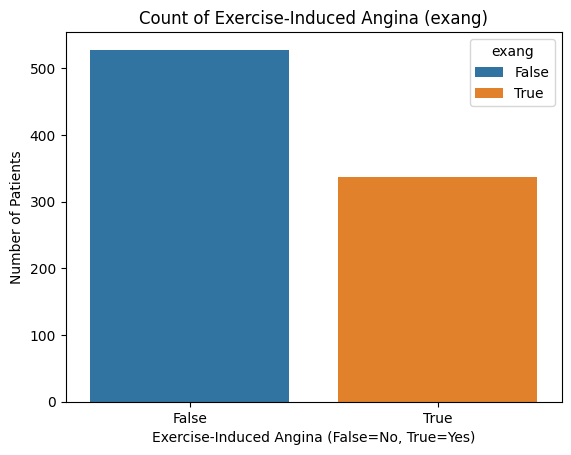

In [10]:
#● How many patients have exercise-induced angina (exang)?
print(df['exang'].value_counts())
sns.countplot(x=df['exang'],hue=df['exang'])
plt.title("Count of Exercise-Induced Angina (exang)")
plt.xlabel("Exercise-Induced Angina (False=No, True=Yes)")
plt.ylabel("Number of Patients")
plt.show()


cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64


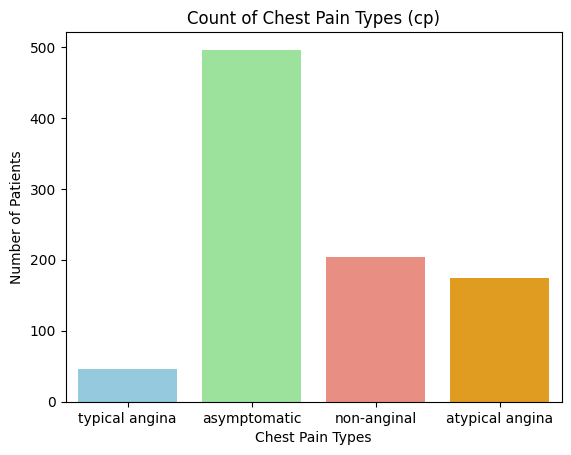

In [11]:
#● What are the counts of different chest pain types (cp)?
print(df['cp'].value_counts())
custom_colors = ['skyblue', 'lightgreen', 'salmon', 'orange']
sns.countplot(x=df['cp'],hue=df['cp'] , palette=custom_colors)
plt.title("Count of Chest Pain Types (cp)")
plt.xlabel("Chest Pain Types")
plt.ylabel("Number of Patients")
plt.show()

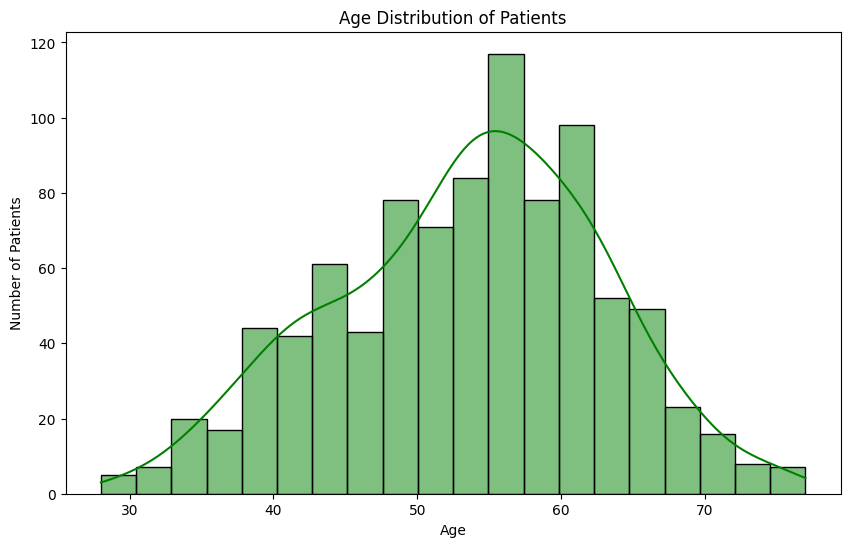

In [12]:
#● Plot the age distribution of the patients.
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True , color='green' , edgecolor='black')
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Number of Patients")
plt.show()

In [13]:
#Compare the average cholesterol levels between patients with and without heart disease.
average_cholesterol_without_heart_disease = df[df['num'] == 0]['chol'].mean()
average_cholesterol_with_heart_disease = df[df['num'] > 0]['chol'].mean()
print(f"Average Cholesterol Level for Patients Without Heart Disease:{average_cholesterol_without_heart_disease:.2f} mg/dl")
print(f"Average Cholesterol Level for Patients With Heart Disease: {average_cholesterol_with_heart_disease:.2f} mg/dl")

Average Cholesterol Level for Patients Without Heart Disease:227.91 mg/dl
Average Cholesterol Level for Patients With Heart Disease: 176.48 mg/dl


<ipython-input-14-409defe274b6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='num', y='chol', data=df, palette='Set3')


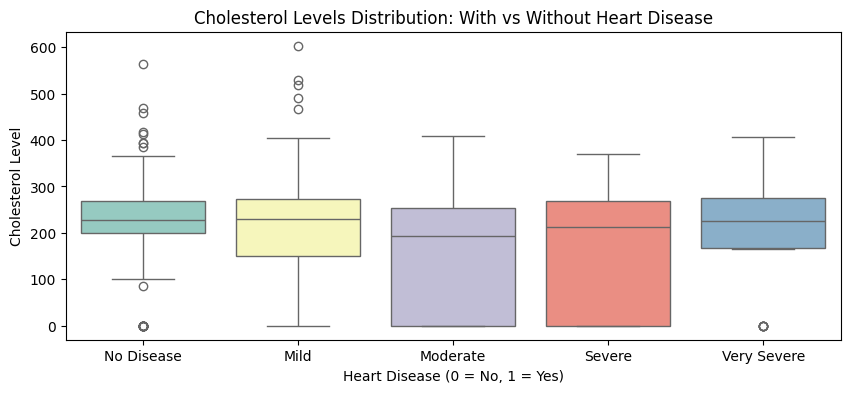

In [14]:
# visualize  the average cholesterol levels between patients with and without heart disease.

plt.figure(figsize=(10, 4))
# Use a color palette explicitly mapped to unique values
sns.boxplot(x='num', y='chol', data=df, palette='Set3')
plt.title("Cholesterol Levels Distribution: With vs Without Heart Disease")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Cholesterol Level")
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=['No Disease', 'Mild', 'Moderate', 'Severe', 'Very Severe'])
plt.show()



**FINDING OUTLIERS FOR CHOL AND BLOOD PRESSURE**


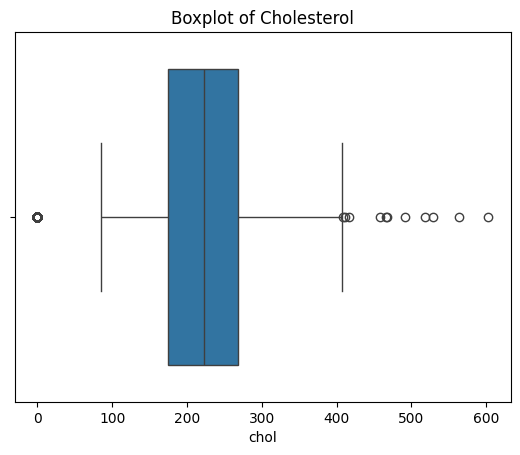

In [15]:
# Cholesterol outliers
sns.boxplot(x=df['chol'])
plt.title("Boxplot of Cholesterol")
plt.show()

In [21]:
# Detect outliers using IQR for cholesterol
chol_IQR = df['chol'].quantile(0.75) -df['chol'].quantile(0.25)

chol_lower_bound = df['chol'].quantile(0.25) - 1.5 * chol_IQR
chol_upper_bound = df['chol'].quantile(0.75) + 1.5 * chol_IQR
chol_outliers = df[(df['chol'] < chol_lower_bound) | (df['chol'] > chol_upper_bound)]
print("Total Cholesterol Outliers:", len(chol_outliers) )
print(chol_outliers['chol'].tolist())

Total Cholesterol Outliers: 183
[417.0, 564.0, 409.0, 412.0, 468.0, 466.0, 529.0, 603.0, 518.0, 491.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 458.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


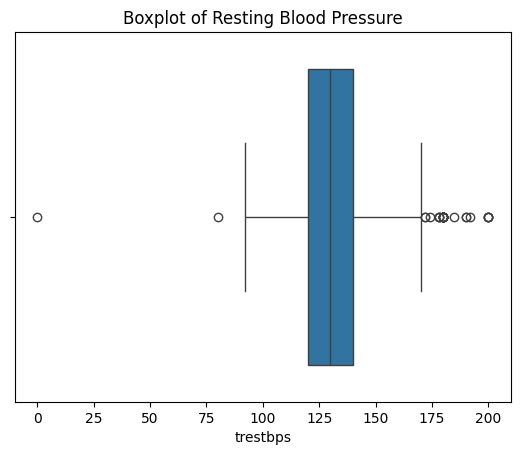

In [22]:
# Resting blood pressure outliers
sns.boxplot(x=df['trestbps'])
plt.title("Boxplot of Resting Blood Pressure")
plt.show()

In [23]:
#Detect outliers for resting blood pressure
trestbps_iqr = df['trestbps'].quantile(0.75) - df['trestbps'].quantile(0.25)
trestbps_lower_bound = df['trestbps'].quantile(0.25) - 1.5 * trestbps_iqr
trestbps_upper_bound = df['trestbps'].quantile(0.75) + 1.5 * trestbps_iqr
trestbps_outliers = df[(df['trestbps'] < trestbps_lower_bound) | (df['trestbps'] > trestbps_upper_bound)]
print("Total Resting Blood Pressure Outliers:", len(trestbps_outliers))
print(trestbps_outliers['trestbps'].tolist())

Total Resting Blood Pressure Outliers: 28
[172.0, 180.0, 200.0, 174.0, 178.0, 192.0, 180.0, 178.0, 180.0, 190.0, 180.0, 180.0, 180.0, 180.0, 200.0, 180.0, 180.0, 80.0, 180.0, 200.0, 185.0, 200.0, 180.0, 0.0, 178.0, 172.0, 180.0, 190.0]
